In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
import torch
from pathlib import Path

##### File paths of trained models

In [2]:
save_dir = Path("../training_outputs/")
paths = sorted([p for p in save_dir.glob("*.pt")], reverse=True)

n_1 = 0
n_2 = 15
paths = paths[n_1:n_2]

Trial 0: lr = 0.0001, graph channels = [128, 256], linear channels = [256], Mean pool, new embedding. ReLU, scaled loss.
Skipped file with learning rate > 0.0001
Trial 2: lr = 0.0001, graph channels = [32, 64], linear channels = [64], Benchmark, mean pool, tanh.
Trial 3: lr = 0.0001, graph channels = [32, 64], linear channels = [64], Benchmark, testing adding a mean pool feature. ReLU.
Trial 4: lr = 0.0001, graph channels = [32, 64], linear channels = [64], Now testing a scaled loss, using Tanh. Benchmark test, small nn.
Trial 5: lr = 0.0001, graph channels = [128, 256], linear channels = [256], Now testing a scaled loss, using Tanh.
Trial 6: lr = 0.0001, graph channels = [128, 256], linear channels = [256], Test of additional embedding and ReLU. Now testing a scaled loss.
Skipped file with learning rate > 0.0001
Skipped file with learning rate > 0.0001
Trial 9: lr = 0.0001, graph channels = [32, 64, 128, 256, 512], linear channels = [512, 256, 128, 64], ReLU.
Trial 10: lr = 0.0001, gr

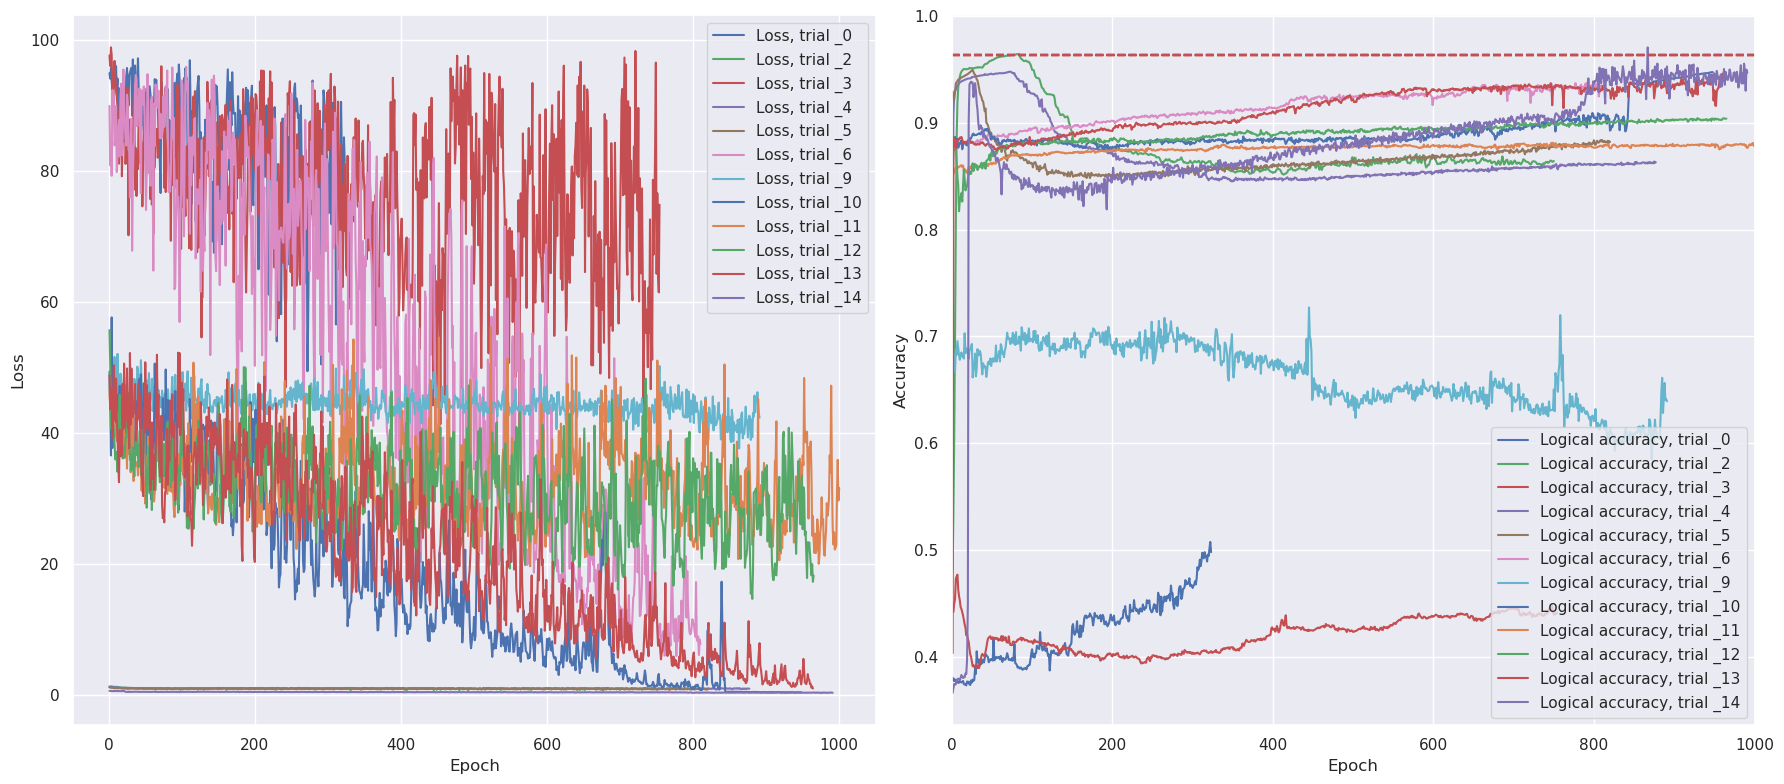

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
colors = sns.color_palette(None, len(paths))

for i, (path, c) in enumerate(zip(paths, colors)):

    training_data = torch.load(path, map_location="cpu")

    history = training_data["training_history"]
    settings = training_data["training_settings"]
    
    # remove too high learning rates for now
    if settings['lr'] > 0.0001:
        print("Skipped file with learning rate > 0.0001")
        continue
    
    if "model_settings" in training_data:
        model_settings = training_data["model_settings"]
        print(f"Trial {i}: lr = {settings['lr']}, graph channels = {model_settings['hidden_channels_GCN']}, linear channels = {model_settings['hidden_channels_MLP']}, {settings['comment']}")
    else:
        print(f"Trial {i}: lr = {settings['lr']}, {settings['comment']}")

    train_loss = history["train_loss"]
    val_accuracy = history["val_accuracy"]
    n_epochs = history["epoch"] + 1
    x = range(1, n_epochs + 1)
    if i == 29:
        print(max(val_accuracy))
    ax[0].plot(
        x, train_loss, color=c, label=f"Loss, trial _{i}"
    )
    ax[1].plot(
        x,
        val_accuracy,
        color=c,
        label=f"Logical accuracy, trial _{i}",
    )
    
    ax[0].set_ylabel("Loss")
    ax[0].set_xlabel("Epoch")
    ax[0].legend()
    ax[1].hlines(0.9635184434535874, 0, 1000, colors="r", ls="--")
    ax[1].set_ylabel("Accuracy")
    ax[1].set_xlabel("Epoch")
    ax[1].legend()
    # ax[1].set_ylim([0.8, 1.])
    ax[1].set_xlim([0, 1000])
    plt.tight_layout()
    

##### Run inference


In [4]:
#model_path = paths[12]
#!python ../scripts/inference.py -f {model_path}